## Simulation and Bootstrapping in Python

For this assignment, your task is to replicate the analysis conducted in Assignment 12, this time utilizing Python instead of R.

**Name:** 

**Section:** 

**Date:**

## This Week's Assignment

In this week's assignment, you'll learn how to:

- sample from an `pandas` dataframe.

- write a user-defined Python function.

- write a `for` loop.

Let's get started!

## The Bootstrap

Bootstrapping is one of the simplest, yet most powerful methods in all of statistics. It provides us an easy way to get a sense of what might happen if we could repeat an experiment several times. It turns estimates into distributions that can be used to calculate all kinds of stuff, including standard errors, confidence intervals and even $p-$values.

Below is a video that explains the main ideas behind this computational technique.

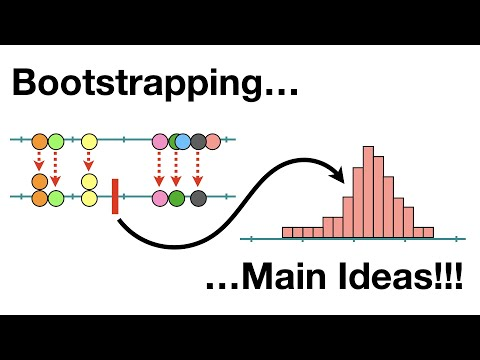

In [2]:
from IPython.display import YouTubeVideo

# YouTube video ID
video_id = 'Xz0x-8-cgaQ'

# Embed the YouTube video
YouTubeVideo(video_id, width=800, height=400)

Most of the time when you're conducting research, it's impractical to collect data from the entire population. This can be due to budget, time constraints, or other factors. Instead, a subset of the population is taken and insight is gathered from that subset to learn more about the population.

Suppose we had data that was the entire population - say all the salaries of the city employees of Raleigh, NC. Before we load the data import the `pandas` module. 

In [1]:
# Import module
...

Run the cell below to load the data.

In [36]:
# Load the dataset
ral = pd.read_csv('data/ral_city_emp_salaries.csv')

## Raleigh City Employees

According to indeed.com, the average City of Raleigh, NC salary ranges from approximately \\$ 39,645 per year for Administrative Technician to \\$118,226 per year for Director of Operations. Average City of Raleigh, NC hourly pay ranges from approximately \\$9.25 per hour for Director of Parks and Recreation to \\$31.62 per hour for System Programmer.

Salary information comes from 6,163 data points collected directly from employees, users, and past and present job advertisements on Indeed in the past 36 months.

Please note that all salary figures are approximations based upon third party submissions to Indeed. These figures are given to the Indeed users for the purpose of generalized comparison only. Minimum wage may differ by jurisdiction and you should consult the employer for actual salary figures.

For information on the positions and related salaries see https://www.indeed.com/cmp/City-of-Raleigh-Nc/salaries.

**Note:** Even though this information is public record the names have been removed for this exercise.

Let's look at information about the dataset.

**Question 1.** Use the `.info()` method to access information about the `ral` dataframe.

In [ ]:
...

**Question 2.** Give a breif description of each variable and its data type.

**Type you answer here replacing this text** 

**Question 3.** Before we start our analysis and complete our assignment we need to load the `pyploy` from `matplotlib`. This will give us access to additional plotting functionality.

In [6]:
# Import module
...

Now let's get more details. 

**Example 1.** What are the different departments and how many employees does each department have?

In [15]:
ral.DEPARTMENT.value_counts()

PARK AND RECREATION        2397
POLICE                      862
CONVENTION CENTER           673
FIRE                        546
PUBLIC UTILITIES            474
PUBLIC WORKS                369
SOLID WASTE SERVICES        236
INSPECTIONS                 143
FINANCE                     102
EMERGENCY COMMUNICATION      68
INFORMATION TECHNOLOGY       60
COMMUNITY SERVICES           51
GENERAL GOVERNMENT           49
PLANNING                     43
PERSONNEL                    29
COMMUNITY DEVELOPMENT        22
PUBLIC AFFAIRS               20
ADMINISTRATIVE SERVICES      19
Name: DEPARTMENT, dtype: int64

**Question 4.** Which department has the most employees? Which department has the least number of employees? Is there a department that has more or less employees than you expected? Which one? Why?

**Type you answer here replacing this text** 

Suppose we wanted to report the mean salary for a typical full-time employee of the City of Raleigh. Since we have all the salaries we can find the population mean. But before we can do that, we need to change the data type in 2 of the columns. The output from the `.info()` method was:

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SALARY       3346 non-null   object
 1   HOURLY RATE  2817 non-null   object
 2   TITLE        6163 non-null   object
 3   DEPARTMENT   6163 non-null   object
dtypes: object(4)
memory usage: 192.7+ KB
```

So we need to do some wrangling with the `SALARY` and `HOURLY.RATE` columns to convert the values from `object` to `float64`.

## Data Wrangling

There are two issues. The first is with the values in the `SALARY` column:

- The values are stored as strings.
- Some of the salary values are `NaN` (missing).

and the other is with the values in the `HOURLY.RATE` column:

- Some of the employees are paid per hour, thus their yearly salary is missing.

If we want the mean salary we will need to convert the string salary values into numbers, then compute the yearly earnings for an hourly employee.

Let's get started!

**Example 2.** Remove the dollar sign and comma from one of the `SALARY` values.

Run the cell below to see the second observation in the `ral` dataframe for `SALARY`.

**Note:** We use the index value `[1]` because Python index values start with 0.

In [18]:
ral.SALARY[1]

'$32,166.61 '

**Example 3.** Use the `gsub` command to remove the `$` and the `,`. 

**Note:** [Here is a ChatGPT conversation](https://chat.openai.com/share/412adeb3-c4b2-4410-af05-6c24c35dc9e1) that explains the code below.

In [19]:
ral.SALARY[1].replace('$', '').replace(',', '').strip()

'32166.61'

**Example 4.** Use the `float` command to convert the data type of the output from the `ral.SALARY[1].replace('$', '').replace(',', '').strip()` command from a string to a number.

In [173]:
float(ral.SALARY[1].replace('$', '').replace(',', '').strip())

32166.61

Now that we know how to do one value, we can do this for all the values. To apply this to all the items in the column we can use a user-defined function.

**Note:** [Here is a ChatGPT conversation](https://chat.openai.com/share/5e7f0001-c90f-4d08-9f21-3b8a0d29d7df) that explains the code below.

In [37]:
# Define a function to remove the '$', ',', and space
def convert_to_number(currency_string):
    
    # Make sure value is no NaN
    if pd.notna(currency_string):
        
        # Remove '$' and ',' characters
        cleaned_currency_string = currency_string.replace('$', '').replace(',', '')

        # Convert the cleaned string to a float
        currency_value = float(cleaned_currency_string)
    
        # Return the numerical value 
        return currency_value
    else:
        return currency_string

# Use the convert_to_number function on
# every element in the SALARY column

# Save the output to an object named
# ys (yearly salary)
ys = ral.SALARY.apply(convert_to_number)

# Display the first 10 results
ys[:10]

0         NaN
1    32166.61
2         NaN
3    35667.52
4         NaN
5    32166.61
6    23474.67
7    35418.45
8         NaN
9         NaN
Name: SALARY, dtype: float64

Use the `.apply()` method and the `convert_to_number` function to change each value in the `HOURLY.RATE` column from a string to a number. Save the output to an object named `hr` (hourly rate). Display the first 10 results.

**`.apply()` method for Pandas DataFrames:**  The `.apply()` method is used to apply a function along the axis of a DataFrame or Series.

In [41]:
hr = ral['HOURLY RATE'].apply(...)
hr[:10]

0    18.00
1      NaN
2    12.00
3      NaN
4     8.25
5      NaN
6      NaN
7      NaN
8     8.25
9     7.00
Name: HOURLY RATE, dtype: float64

**Example 5.** Take the `ys` and `hr` `Series` and combine them into a `DataFrame`.

In [53]:
df = pd.DataFrame({'yearly': ys, 'hourly': hr})
df.head(10)

,yearly,hourly
0,NaN,18.00
1,32166.61,NaN
2,NaN,12.00
3,35667.52,NaN
4,NaN,8.25
5,32166.61,NaN
6,23474.67,NaN
7,35418.45,NaN
8,NaN,8.25
9,NaN,7.00


**Question 5.** For the last step we need to compute the yearly salary for an employee that is paid hourly. Here's where you get to make some choices. Assign a value to teach variable `weeks_per_year` and `hours_per_week`. 

Explain you choices in a comment in the code cell. You can remove the `_______` and the `...` and complete each statement.

In [172]:
# Weeks worked in a year
weeks_per_year = ...

# I choose ___ weeks because ...

# Hours worked in a week
hours_per_week = ...

# I choose ___ hours because ...

Based on your choices here's the yearly earnings for an employee that earns \$18.00 per hour. 

**Note:** This is the first observation in our `df` dataframe.

In [56]:
df.hourly[0] * weeks_per_year * hours_per_week

36000.0

## `.notna()`

Some of the employees already have a yearly salary so we don't need to do any calculations. We only need to do this for employees that have a value in the `hr` column. So, if we were saying it out loud, it would go like this:

1. we need to check the `hr` to see if there is a value;
1. if there is a value, then we need to calculate the yearly earnings;
1. to calculate the yearly earnings we can multiply the hourly rate by the number of weeks and the hours per week;
1. finally we nee to do this for all the values in the `hr` column.

Thankfully, the `.notna()` method makes it realatively easy to do all of this in one line of Python code. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.Series.notna.html) to read about the `.notna()` `pandas` Series method.

**Example 6.** Use the `.notna()` method and the `.apply()` method to compute the yearly earnings from the hourly rate.

**Note:** A function has been provided below. Readh the [ChatGPT discussion](https://chat.openai.com/share/202d9bbf-3ca0-4eb4-8b44-ec48736ae0cd) to learn what each line of code does.

In [68]:
# Define a function to check for NaN and perform multiplication
def calculate_yearly_salary(row):
        
    # Checks the value in the hourly column to see if its NaN
    if not pd.isna(row.hourly):
        
        # Calculate the yearly salary
        ys = row.hourly * weeks_per_year * hours_per_week
        
        # Return the value of the calculated yearly salary
        return ys 
    else:
        
        # Return the value of the yearly salary
        return row.yearly

Save the output to a Series named `salaries`.

In [69]:
salaries = ...
salaries[:10]

0    36000.00
1    32166.61
2    24000.00
3    35667.52
4    16500.00
5    32166.61
6    23474.67
7    35418.45
8    16500.00
9    14000.00
dtype: float64

Now we can find the mean and medain salary for all City of Raleigh, NC employees.

In [72]:
# Find the median value in the salaries Series
print('The median salary is', salaries.median())

# Find the mean value in the salaries Series
print('The mean salary is', salaries.mean())

The median salary is 31617.57
The mean salary is 35360.778989128674


**Question 6.** Interpret the meaning of the mean and median salary within the context of the City of Raleigh data. Why do you think there is a difference of almost \$4,00 dollars between them?

**Type you answer here replacing this text** 

# A Sample

A random sample is a subset of data or individuals taken from a larger population or dataset in such a way that each member of the population has an equal and independent chance of being included in the sample. The goal of taking a random sample is to ensure that the sample is representative of the entire population, allowing for valid statistical inferences and generalizations to be made about the population as a whole.

**Example 7.** Sample one observation from the `salaries` Series.

**Note:** The `.sample()` method, by default, samples without replacement. This means that the same element can not be chosen more than once in the random sample. If you want to sample with replacement (each element can only be chosen once), you need to explicitly set the `replace` argument to `True`. 

In [73]:
# One sampled observation
salaries.sample(n=1, replace=True)

5823    50922.2
dtype: float64

If we re-run the code cell above, we would most likely get a different value. Try it and see.

In [74]:
# One sampled observation
salaries.sample(n=1, replace=True)

3123    47855.18
dtype: float64

What we want to do is draw a large enough sample from a population in order to draw conclusions about a population without having to examine every single member of that population. In our activity we have the population, but for the sake of this activity let's pretend that we don't.

To ensure that your work is reproducible we will set a seed. What does it mean to set a seed?

In the context of the python programming language, setting a seed refers to initializing the random number generator with a specific value. This is important when you want to ensure reproducibility in your code, especially when generating random numbers.

In python, the random number generator is used in functions that involve randomness, such as sampling or generating random numbers from distributions. When you set a seed, you are essentially starting the random number generator at a specific point, and if you use the same seed again, you should get the same sequence of random numbers.

We can use the `random_state` parameter to set the seed to a specific value.

In the cell below set the seed for this notebook using 4 digits from either your birthdate, street address, phone number , etc. **Note:** The first digit can not be 0.

In [157]:
seed = ...

**Example 8.** Sample 500 observations from the `salaries` vector.

In [158]:
s = 500
salaries_sample = salaries.sample(n=s, random_state=seed)

What is the median annual salary in our sample? Is it the same value as the median salary in the full datasaet?

In [159]:
print('The median salary in our sample of', s, 'is', salaries_sample.median())
print('The median salary in our population of', len(salaries), 'is', salaries.median())

The median salary in our sample of 500 is 32166.61
The median salary in our population of 6163 is 31617.57


**Question 7.** Could we make a statement about the population based off of our sample of 500 observations? Would this be a good idea? Explain.

**Type you answer here replacing this text** 

## A Bootstrap Sample Mean

Suppose we take a random sample from our sample (with replacement). Would that give us a better idea of the mean salary for a typical full-time City of Raleigh employee?

Let's try!

**Example 9.** Collect one bootstrap sample from the `salaries_sample` Series. Calculate the mean of that sample.

**Note:** We do not specify a size because we want the sample size to equal the number of items in the sample - 500.

In [160]:
# Perform a bootstrap sample
one_bootstrap_sample = salaries_sample.sample(n=s, replace=True)

# Calculate the median of one bootstrap sample
print('The mean salary in our bootstrap of', len(salaries_sample), 'is', one_bootstrap_sample.mean())

# The median of the population
print('The mean salary in our population of', len(salaries), 'is', salaries.mean())

The mean salary in our bootstrap of 500 is 35687.86354
The mean salary in our population of 6163 is 35360.778989128674


**Question 8.** If we did another bootstrap sample and calculated it's mean, do you think we would get the same value? Explain.

**Note:** There is no correct answer - I just want to know what you think.

**Type you answer here replacing this text** 

**Question 9.** What if we did another 10000 bootstrap samples and calculated the mean each time, do you think we would ever the same mean? Explain.

**Type you answer here replacing this text** 

## Lots of Bootstrap Sample Means

To proceed we will use the power of `NumPy`. Remember, `NumPy` is a numerical computing library for Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. `NumPy` is a fundamental package for scientific computing in Python, and it forms the foundation for many other libraries and tools in the Python data science ecosystem.

Complete the code cell below to import `NumPy`.

In [161]:
# Import module
...

**Example 10.** Let's do 10000 bootstrap sample means.

In [162]:
# Initialize an empty list to store each bootstrap sample mean
bootstrap_sample_means = np.array([])

# For loop to calculate a bootstrap sample mean
for _ in range(10000):
    one_bootstrap_sample = salaries_sample.sample(n=s, replace=True)
    bootstrap_sample_means = np.append(bootstrap_sample_means, one_bootstrap_sample.mean())

**Example 11.** To analyze the distribution (i.e.; frequency and pattern) of our bootstrap means let's visualize our data using a histogram.

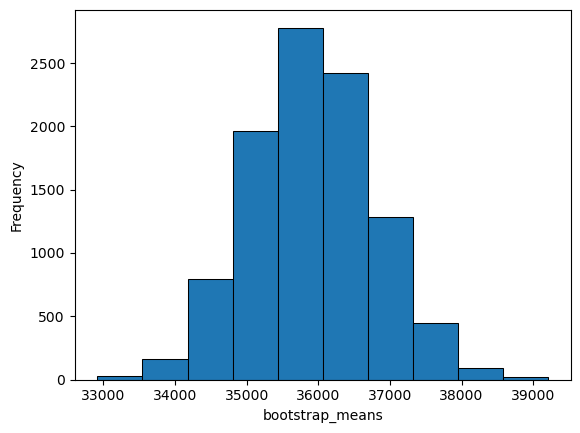

In [163]:
# Create a histogram of the bootstrap sample means
plt.hist(bootstrap_sample_means, edgecolor='black', linewidth=0.75)
plt.xlabel('bootstrap_means')
plt.ylabel('Frequency');

**Question 10.** Based on the histogram above, do you think the true mean salary (or at least a value that's really close to it) occurs more frequently that other values? Explain.

**Note:** I'm not necessarily looking for you to provide the correct answer - I just want to know what you think.

**Type you answer here replacing this text** 

**Example 12.** Show the location of the mean of all the bootstrap sample means and the true average salary.

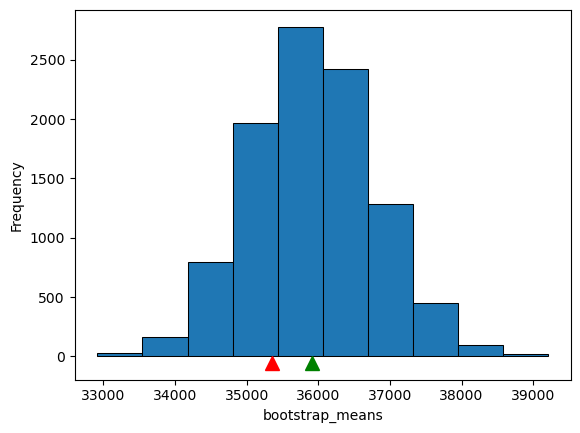

In [164]:
# Create a histogram of the bootstrap sample means
plt.hist(bootstrap_sample_means, edgecolor='black', linewidth=0.75)

# Plot a red marker for the true average salary
plt.plot(salaries.mean(), -55, marker='^', color='red', markersize=10)

# Plot a green marker for the mean salary of the bootstrapped means
plt.plot(bootstrap_sample_means.mean(), -55, marker='^', color='green', markersize=10)

# Add labels
plt.xlabel('bootstrap_means')
plt.ylabel('Frequency');

In [165]:
# Calculate the mean of one bootstrap sample distribution
print('The mean salary in our bootstrap distribution of', len(bootstrap_sample_means), 'bootstrapped sample means, each with size', len(salaries_sample), 'is', bootstrap_sample_means.mean())

# The median of the population
print('The mean salary in our population of', len(salaries), 'is', salaries.mean())

The mean salary in our bootstrap distribution of 10000 bootstrapped sample means, each with size 500 is 35912.199521610004
The mean salary in our population of 6163 is 35360.778989128674


**Question 11.** If we did this again do you think that the mean of the bootstrapped sample means would be closer to the true mean salary? Further away? Explain.

**Note:** I'm not necessarily looking for you to provide the correct answer - I just want to know what you think.

**Type you answer here replacing this text** 

**Example 13.** Show the location of the mean of all the bootstrap sample means, the true average salary, and a 95% confidence interval.

The 95% confidence interval is ( 34257.62 , 37624.81 )
The true mean is  35360.78
The mean of the bootstrapped samples is 35912.2


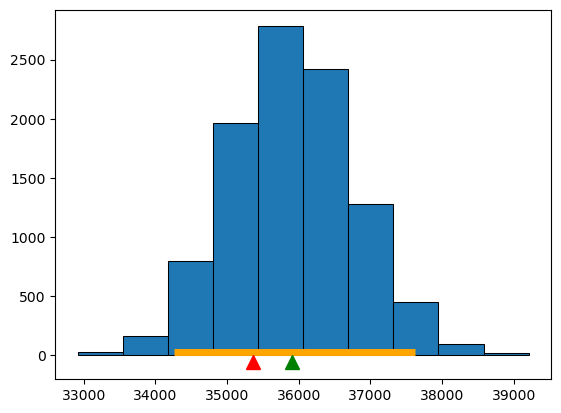

In [170]:
# Get lower and upper bound
lower_bound = np.percentile(bootstrap_sample_means, 2.5)
upper_bound = np.percentile(bootstrap_sample_means, 97.5)

# Create a histogram of the bootstrap sample means
plt.hist(bootstrap_sample_means, edgecolor='black', linewidth=0.75)

# Plot a 95% confidence interval
plt.hlines(25, lower_bound, upper_bound, color='orange', linewidth=5)

# Plot a red marker for the true average salary
plt.plot(salaries.mean(), -60, marker='^', color='red', markersize=10)

# Plot a green marker for the mean salary of the bootstrapped means
plt.plot(bootstrap_sample_means.mean(), -60, marker='^', color='green', markersize=10)

# Print statements
print("The 95% confidence interval is (", round(lower_bound, 2), ",",round(upper_bound, 2), ")")
print("The true mean is ", round(salaries.mean(), 2))
print("The mean of the bootstrapped samples is", round(bootstrap_sample_means.mean(), 2))

**Example 14.** Show the location of the mean of all the bootstrap sample means, the true average salary, and a 90% confidence interval.

The 95% confidence interval is ( 34510.99 , 37376.42 )
The true mean is  35360.78
The mean of the bootstrapped samples is 35912.2


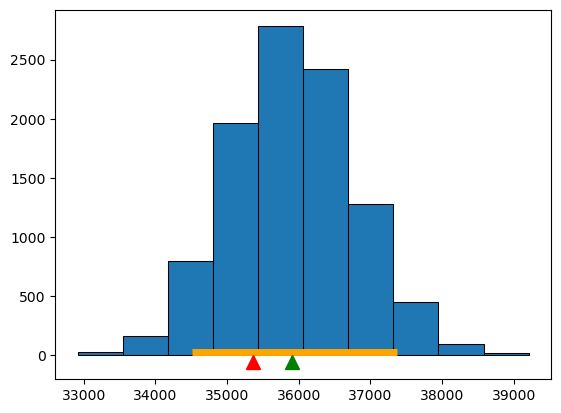

In [171]:
# Get lower and upper bound
lower_bound = np.percentile(bootstrap_sample_means, 5)
upper_bound = np.percentile(bootstrap_sample_means, 95)

# Create a histogram of the bootstrap sample means
plt.hist(bootstrap_sample_means, edgecolor='black', linewidth=0.75)

# Plot a 90% confidence interval
plt.hlines(25, lower_bound, upper_bound, color='orange', linewidth=5)

# Plot a red marker for the true average salary
plt.plot(salaries.mean(), -60, marker='^', color='red', markersize=10)

# Plot a green marker for the mean salary of the bootstrapped means
plt.plot(bootstrap_sample_means.mean(), -60, marker='^', color='green', markersize=10)

# Print statements
print("The 95% confidence interval is (", round(lower_bound, 2), ",",round(upper_bound, 2), ")")
print("The true mean is ", round(salaries.mean(), 2))
print("The mean of the bootstrapped samples is", round(bootstrap_sample_means.mean(), 2))

**Question 12.** Does the true mean appear within the conficence interval? If not, do you think we could perform a simulation where the true mean of the population falls inside of the confidence interval? If so, do you think we could perform a simulation where the true mean of the population falls outside of the confidence interval? Explain.

**Note:** I'm not necessarily looking for you to provide the correct answer - I just want to know what you think.

**Type you answer here replacing this text** 